## Adattisztítás

In [3]:
import pandas as pd
df=pd.read_csv('animal_condition.csv')
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


In [4]:
animalName = list(df['AnimalName'].str.lower().unique())
animalName.sort()
animalName

['birds',
 'black-tailed deer',
 'buffaloes',
 'cat',
 'cattle',
 'chicken',
 'cow',
 'deer',
 'dog',
 'dogs',
 'donkey',
 'duck',
 'elephant',
 'elk',
 'fowl',
 'fox',
 'fox ',
 'goat',
 'goats',
 'hamster',
 'horse',
 'hyaenas',
 'lion',
 'mammal',
 'monkey',
 'moos',
 'mule deer',
 'mules',
 'other birds',
 'pig',
 'pigs',
 'rabbit',
 'reindeer',
 'sheep',
 'sika deer',
 'snake',
 'tiger',
 'turtle',
 'wapiti',
 'white-tailed deer',
 'wolves']

C:\Users\misur\AppData\Local\Temp\ipykernel_6480\1178170701.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


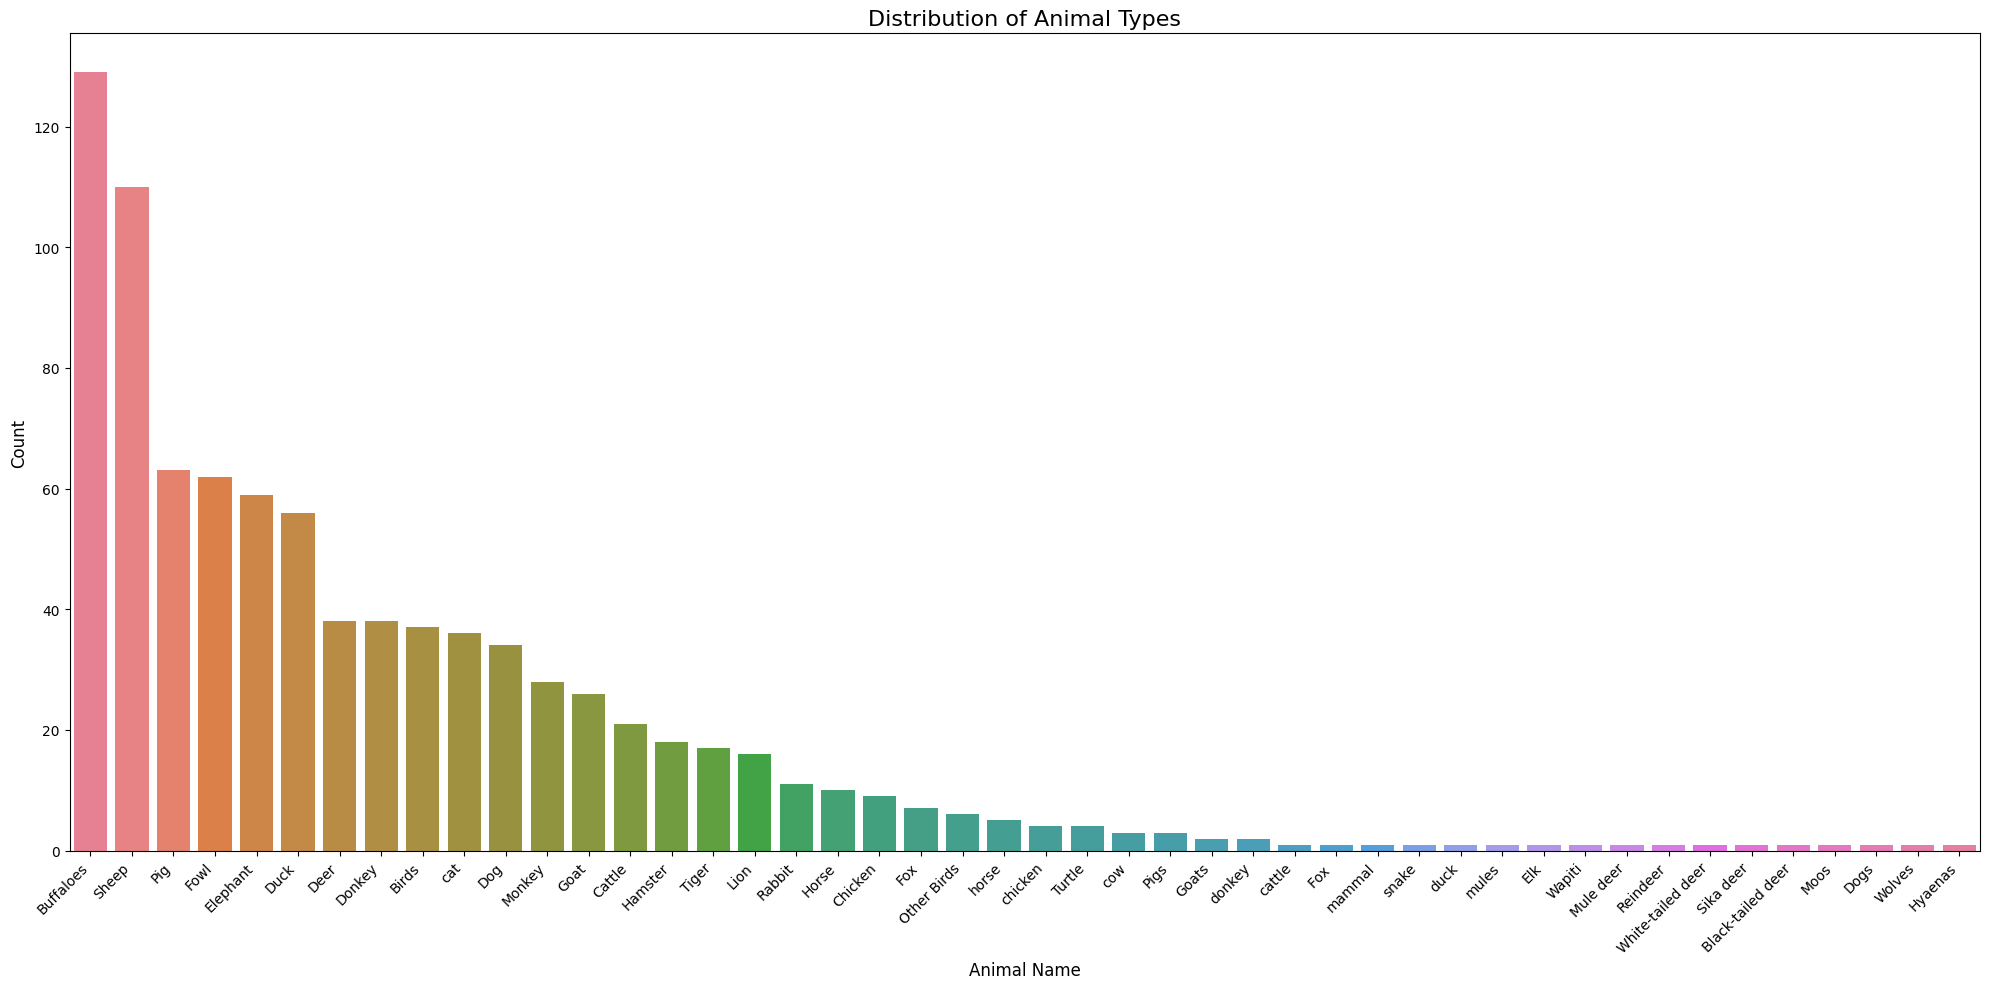

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


unique_animals = df['AnimalName'].value_counts().index
num_colors = len(unique_animals)
colors = sns.color_palette("husl", num_colors)

plt.figure(figsize=(20, 10))
sns.countplot(
    x='AnimalName',
    data=df,
    order=unique_animals,
    palette=dict(zip(unique_animals, colors))
)

plt.title('Distribution of Animal Types', fontsize=16)
plt.xlabel('Animal Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
s1 = set(df["symptoms1"].unique())
s2 = set(df["symptoms2"].unique())
s3 = set(df["symptoms3"].unique())
s4 = set(df["symptoms4"].unique())
s5 = set(df["symptoms5"].unique())

In [271]:
len(s1.intersection(s2))


21

In [215]:
len(s1.intersection(s3))


24

In [216]:
len(s1.intersection(s4))


25

In [217]:
len(s1.intersection(s5))


20

In [ ]:
# Mennyi unique van?
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)


935

In [ ]:
# kis és nagybetű probléma
len(df[df['symptoms1'].str.lower() == 'fever']) == len(df[df['symptoms1'] == 'Fever'])

False

In [ ]:
test_df = df[df['symptoms1'].str.lower() == 'fever']
test_df['symptoms1'].unique()

array(['Fever', 'fever'], dtype=object)

In [251]:
df[df['symptoms1'] == 'fever'].head()


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
386,horse,fever,mild colic,loss of tail tone,loss of appetite,depression,Yes
388,horse,fever,loss of appetite,respiratory noise,Weight loss,depression,Yes
389,horse,fever,nasal discharge,muscular stiffness,swollen lymph nodes,depression,Yes
415,Buffaloes,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression,Yes
416,Sheep,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression,Yes


In [252]:
df[df['symptoms1'] == 'Fever'].head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [341]:
# So, there is an overlap of same symptoms with different cases
cols = list(df.columns)
for col in cols:
    df[col] = df[col].str.lower()

In [ ]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,dog,fever,diarrhea,vomiting,weight loss,dehydration,yes
1,dog,fever,diarrhea,coughing,tiredness,pains,yes
2,dog,fever,diarrhea,coughing,vomiting,anorexia,yes
3,dog,fever,difficulty breathing,coughing,lethargy,sneezing,yes
4,dog,fever,diarrhea,coughing,lethargy,blue eye,yes


In [343]:
# rechecking unique count 
s1 = set(df["symptoms1"].unique())
s2 = set(df["symptoms2"].unique())
s3 = set(df["symptoms3"].unique())
s4 = set(df["symptoms4"].unique())
s5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms 
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

879

In [345]:
s_total = list(s_total)
s_total.sort()
s_total[:10]

[' abortion at the end of gestation',
 ' dizziness and fainting',
 'abdminal pain',
 'abdominal destention',
 'abdominal discomfort',
 'abdominal pain',
 'abdonormal discomfort',
 'abdonormal pain',
 'abnormal behaviour',
 'abnormal conformation']

In [ ]:
s_total[0] # van előtte space itt


' abortion at the end of gestation'

In [ ]:
s_total[2], s_total[5] #ezek full ugyanolyak


('abdminal pain', 'abdominal pain')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [ ]:
df.isnull().sum()
#NUll értékek keresése

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [348]:
df_null = df.isnull()
df_null[df_null['Dangerous'] == True]


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,False,False,False,False,False,False,True
695,False,False,False,False,False,False,True


In [349]:
df.iloc[269]


AnimalName             sheep
symptoms1      teeth griding
symptoms2             apathy
symptoms3        dehydration
symptoms4     ruminal stasis
symptoms5      watery faeces
Dangerous                NaN
Name: 269, dtype: object

In [263]:
df.iloc[695]

AnimalName         buffaloes
symptoms1      teeth griding
symptoms2             apathy
symptoms3        dehydration
symptoms4     ruminal stasis
symptoms5      watery faeces
Dangerous                NaN
Name: 695, dtype: object

In [ ]:
# Mindkét diagnózis ugyanaz érdekes módon! Én ezeket eldobom
df = df.dropna(how='any',axis=0)

In [ ]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64

In [ ]:
# Furcsa unique értékek keresése
characters_unique = set()
cols = list(df.columns)
for col in cols:
    for value in df[col]:
        for letter in value:
            characters_unique.add(letter)

list(characters_unique)

[')',
 ' ',
 'r',
 'e',
 'a',
 'd',
 ',',
 'n',
 'x',
 'u',
 'f',
 '_',
 '.',
 'p',
 'l',
 'v',
 'z',
 'q',
 'j',
 'b',
 'g',
 'i',
 's',
 'o',
 'c',
 'w',
 'h',
 '-',
 '(',
 't',
 'k',
 'y',
 'm',
 '\xa0']

In [ ]:
import string # melyek nem betűk?
temp = []
for ele in characters_unique:
    if ele not in string.ascii_lowercase:
        temp.append(ele)
temp

[')', ' ', ',', '_', '.', '-', '(', '\xa0']

In [ ]:
# Karaktertisztító
def clean(word):
    for extra in ['_', '-', ',', '\xa0', ' ', '.', ')', '(']:
        word = word.replace(extra, ' ')

    list_words = word.split()
    final_word = ""
    for ele in list_words:
        ele = ele.strip()

        flag = True
        for letter in ele:
            if letter not in string.ascii_lowercase:
                flag = False

        if flag:
            final_word += ele + " "

    return final_word.strip()

# Testing. Works?
clean('  test .test test_  ')

'test test test'

In [ ]:
# Megtisztítjuk a kellemetlen karakterektől
cols = list(df.columns)
for col in cols:
    df[col] = df[col].apply(clean)

C:\Users\misur\AppData\Local\Temp\ipykernel_15212\683525070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(clean)


In [ ]:
s1 = set(df["symptoms1"].unique())
s2 = set(df["symptoms2"].unique())
s3 = set(df["symptoms3"].unique())
s4 = set(df["symptoms4"].unique())
s5 = set(df["symptoms5"].unique())

s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

862

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Teszt
similar("Apple","Appel")

0.8

In [ ]:
similar('abdminal pain', 'abdominal pain')

0.9629629629629629

In [272]:
df[772:]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
774,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
775,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
776,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
777,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
778,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
...,...,...,...,...,...,...,...
866,buffaloes,fever,difficulty breathing,poor appetite,eye and skin change,unable to exercise,yes
867,buffaloes,fever,loss of appetite,lession on the skin,lethargy,joint pain,yes
868,buffaloes,lesions in the nasal cavity,lesions on nose,vomiting,noisy breathing,lesions on nose,yes
869,buffaloes,hair loss,dandruff,vomiting,crusting of the skin,ulcerated skin,yes


In [360]:
def change(df, ws, new):
    symps = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']
    for col in symps:
        for w in ws:
            df[col] = df[col].replace(w, new)
    return df

In [361]:
s_total = list(s_total)

similarity_scores = []
for i1, word1 in enumerate(s_total):
    for i2, word2 in enumerate(s_total[i1+1:]):
        ratio = similar(word1, word2)
        if ratio > 0.75: # Keeping 0.75 as threshold
            value = [ratio, (word1, word2)]
            similarity_scores.append(value)

similarity_scores.sort(key=lambda val: val[0], reverse = True)
len(similarity_scores)

310

In [ ]:
similarity_scores # rengeteg a hasonlóság, ezt később kezelni kell!

[[0.9787234042553191, ('difficulty in breathing', 'difficultty in breathing')],
 [0.975609756097561, ('high body temperaure', 'high body temperature')],
 [0.975609756097561, ('difficult in walking', 'difficulty in walking')],
 [0.9743589743589743, ('diffculty breathing', 'difficulty breathing')],
 [0.9743589743589743, ('difficulty breathing', 'difficulty breating')],
 [0.972972972972973, ('discharge from eye', 'discharge from eyes')],
 [0.9714285714285714, ('skin color change', 'skin colour change')],
 [0.9714285714285714, ('aversion to light', 'anversion to light')],
 [0.9714285714285714, ('decreased appetite', 'decrease appetite')],
 [0.9696969696969697, ('loss of appettite', 'loss of appetite')],
 [0.9696969696969697, ('occular discharge', 'ocular discharge')],
 [0.967741935483871, ('fluffed feathers', 'fluffed feather')],
 [0.9629629629629629, ('abdominal pain', 'abdminal pain')],
 [0.9565217391304348, ('skin reashes', 'skin rashes')],
 [0.9565217391304348, ('inappentence', 'inappe

In [ ]:
s1 = set(df["symptoms1"].unique())
s2 = set(df["symptoms2"].unique())
s3 = set(df["symptoms3"].unique())
s4 = set(df["symptoms4"].unique())
s5 = set(df["symptoms5"].unique())

s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

862

In [277]:
df.describe()


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
count,869,869,869,869,869,869,869
unique,40,222,223,223,209,193,3
top,buffaloes,fever,diarrhea,coughing,weight loss,pains,yes
freq,128,271,125,95,117,99,848


In [322]:
df.isna().sum()


AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64

In [ ]:
df['Dangerous'].value_counts() #van ami nem yes és no!

Dangerous
yes          848
no            20
yeearings      1
Name: count, dtype: int64

In [363]:
df = df[df['Dangerous'].isin(['yes', 'no'])]

In [364]:
df.dropna(inplace=True)


In [ ]:
df[df.duplicated()] # duplikáltak vannak!!!


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
772,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
773,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
774,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
775,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
776,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
777,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
778,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
779,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
780,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes
781,tiger,fetopelvic dispropotion,uteria inertia,malpresentation,death,pains,yes


In [366]:
df[df.duplicated()].count()


AnimalName    30
symptoms1     30
symptoms2     30
symptoms3     30
symptoms4     30
symptoms5     30
Dangerous     30
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [368]:
# rechecking unique count 
s1 = set(df["symptoms1"].unique())
s2 = set(df["symptoms2"].unique())
s3 = set(df["symptoms3"].unique())
s4 = set(df["symptoms4"].unique())
s5 = set(df["symptoms5"].unique())

# Checking the total number of unique symptoms 
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

862

In [ ]:
# Unique animal names
df["AnimalName"].unique()

array(['dog', 'cat', 'rabbit', 'cow', 'chicken', 'cattle', 'mammal',
       'horse', 'turtle', 'hamster', 'lion', 'fox', 'goat', 'deer',
       'monkey', 'birds', 'sheep', 'pigs', 'fowl', 'duck', 'other birds',
       'snake', 'donkey', 'mules', 'elephant', 'elk', 'wapiti',
       'mule deer', 'black tailed deer', 'sika deer', 'white tailed deer',
       'reindeer', 'moos', 'tiger', 'goats', 'buffaloes', 'dogs',
       'wolves', 'hyaenas', 'pig'], dtype=object)

In [ ]:
import pandas as pd

text_columns = ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']

df['AnimalName'] = df['AnimalName'].replace('dogs', 'dog')
df['AnimalName'] = df['AnimalName'].replace('wolves', 'wolf')
df['AnimalName'] = df['AnimalName'].replace('moos', 'moose')
df['AnimalName'] = df['AnimalName'].replace('buffaloes', 'buffalo')
df['AnimalName'] = df['AnimalName'].replace('ducks', 'duck')
df['AnimalName'] = df['AnimalName'].replace('mules', 'mule')
df['AnimalName'] = df['AnimalName'].replace('hyaenas', 'hyaena')
df['AnimalName'] = df['AnimalName'].replace('goats', 'goat')
df['AnimalName'] = df['AnimalName'].replace('pigs', 'pig')
df['AnimalName'] = df['AnimalName'].replace('cow', 'cattle') # cow is feamle cattle

for col in text_columns:
    df[col] = df[col].str.strip().str.lower()

def categorize_animal(animal_name):
    animal_name = animal_name.lower().strip()
    # Alapértelmezett értékek
    animal_group = 'unknown'
    animal = animal_name
    species = animal_name

    # Kategorizálás
    if animal_name in ['fox', 'wolf', 'hyaena', 'dog']:
        animal_group = 'mammal'
        animal = 'canid'
        species = animal_name
    elif animal_name in ['cat','lion', 'tiger']:
        animal_group = 'mammal'
        animal = 'cat-like'
        species = animal_name
    elif animal_name in ['cattle', 'buffalo', 'deer', 'reindeer', 'elk', 'wapiti', 'mule deer', 'black tailed deer', 'sika deer', 'white tailed deer', 'moose', 'pig', 'sheep', 'goat']:
        animal_group = 'mammal'
        animal = 'even-toed ungulates'
        species = animal_name
    elif animal_name in ['horse', 'donkey', 'mule']:
        animal_group = 'mammal'
        animal = 'odd-toed ungulates'
        species = animal_name
    elif animal_name in ['elephant']:
        animal_group = 'mammal'
        animal = 'elephant'
        species = 'unknown'
    elif animal_name in ['hamster','rabbit']:
        animal_group = 'mammal'
        animal = 'rodent'
        species = animal_name
    elif animal_name in ['monkey']:
        animal_group = 'mammal'
        animal = 'monkey'
        species = 'unknown'
    elif animal_name in ['mammal','mammals']:
        animal_group = 'mammal'
        animal = 'unknown'
        species = 'unknown'
    elif animal_name in ['chicken', 'fowl', 'duck', 'birds', 'other birds', 'bird']:
        animal_group = 'bird'
        animal = 'fowl' if animal_name in ['chicken', 'fowl', 'duck'] else 'other birds'
        species = animal_name if animal_name in ['chicken','duck'] else 'unknown'
    elif animal_name in ['turtle', 'snake']:
        animal_group = 'reptile'
        animal = animal_name
        species = 'unknown'

    return animal_group, animal, species

df[['AnimalGroup', 'Animal', 'Species']] = df['AnimalName'].apply(lambda x: pd.Series(categorize_animal(x)))

df = df[['AnimalGroup', 'Animal', 'Species', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5', 'Dangerous']]

In [371]:
df[df['AnimalGroup'] == 'unknown']

,AnimalGroup,Animal,Species,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous


In [333]:
from nltk.corpus import wordnet as wn

fever_syns = wn.synsets("fever")
pyrexia_syns = wn.synsets("pyrexia")

# nézzük meg van-e átfedés a jelentéscsomókban
overlap = any(s1 == s2 for s1 in fever_syns for s2 in pyrexia_syns)
print("Szinonimák WordNet szerint:", overlap)


Szinonimák WordNet szerint: True


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources
import jellyfish

# === NLTK letöltések ===
nltk.download('wordnet')
nltk.download('omw-1.4')

# === SymSpell init ===
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Általános angol szótár betöltése (egyszavas)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Bigram szótár betöltése (több szavas kifejezésekhez)
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=1)

def correct_spelling(word):
    if pd.isna(word):
        return word
    suggestions = sym_spell.lookup_compound(word.lower(), max_edit_distance=2)
    return suggestions[0].term if suggestions else word.lower()

def get_wordnet_canonical(word):
    synsets = wn.synsets(word)
    if not synsets:
        return word
    lemmas = synsets[0].lemma_names()
    return lemmas[0].replace("_", " ") if lemmas else word

symptom_cols = ['symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']

# === Egyedi symptomok kigyűjtése ===
symptoms = pd.concat([df[col] for col in symptom_cols], axis=0).dropna().astype(str).str.lower()
unique_symptoms = sorted(set(symptoms))

# === Helyesírás + canonical forma ===
corrections = {}
for original in unique_symptoms:
    corrected = correct_spelling(original)
    canonical = get_wordnet_canonical(corrected)
    corrections[original] = {'corrected': corrected, 'canonical': canonical}

canonical_symptoms = list({v['canonical'] for v in corrections.values()})

# === Embedding + hasonlóság számítás ===
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(canonical_symptoms, convert_to_tensor=True)
cosine_sim = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()

n = len(canonical_symptoms)
jaro_sim = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        jaro_sim[i, j] = jellyfish.jaro_winkler_similarity(canonical_symptoms[i], canonical_symptoms[j])

semantic_weight = 0.7
lexical_weight = 0.3
hybrid_sim = semantic_weight * cosine_sim + lexical_weight * jaro_sim
hybrid_distance_matrix = 1 - hybrid_sim

# === Klaszterezés ===
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.4, linkage='average', metric='precomputed')
labels = clustering.fit_predict(hybrid_distance_matrix)

cluster_dict = {word: int(label) for word, label in zip(canonical_symptoms, labels)}

# === Mapping létrehozása ===
word_mapping_rows = []
for original, info in corrections.items():
    row = {
        'original': original,
        'corrected': info['corrected'],
        'canonical': info['canonical'],
        'cluster_id': cluster_dict.get(info['canonical'], -1)
    }
    word_mapping_rows.append(row)

word_mapping_df = pd.DataFrame(word_mapping_rows)

# === Info hozzárendelése symptom oszlopokhoz ===
def get_info(symptom):
    if pd.isna(symptom):
        return {'cluster_id': -1, 'corrected': np.nan, 'canonical': np.nan}
    symptom = symptom.lower()
    match = word_mapping_df[word_mapping_df['original'] == symptom]
    if not match.empty:
        return {
            'cluster_id': int(match['cluster_id'].values[0]),
            'corrected': match['corrected'].values[0],
            'canonical': match['canonical'].values[0]
        }
    return {'cluster_id': -1, 'corrected': symptom, 'canonical': symptom}

for col in symptom_cols:
    info = df[col].apply(get_info)
    df[f'{col}_cluster'] = info.apply(lambda x: x['cluster_id'])
    df[f'{col}_corrected'] = info.apply(lambda x: x['corrected'])
    df[f'{col}_canonical'] = info.apply(lambda x: x['canonical'])

df.to_csv('symptom_clustered_output.csv', index=False)
word_mapping_df.to_csv('symptom_word_mapping.csv', index=False)

print("✅ Mentve:\n• symptom_clustered_output.csv (corrected, canonical, cluster_id benne van)\n• symptom_word_mapping.csv")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\misur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\misur\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\misur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\symspellpy\symspellpy.py:1098: UserWarning: Failed to parse frequency count as a 64 bit integer.
  warnings.warn("Failed to parse frequency count as a 64 bit integer.")


✅ Mentve:
• symptom_clustered_output.csv (corrected, canonical, cluster_id benne van)
• symptom_word_mapping.csv


In [ ]:
# rechecking unique count 
s1 = set(df["symptoms1_cluster"].unique())
s2 = set(df["symptoms2_cluster"].unique())
s3 = set(df["symptoms3_cluster"].unique())
s4 = set(df["symptoms4_cluster"].unique())
s5 = set(df["symptoms5_cluster"].unique())

# Checking the total number of unique symptoms 
s_total = s1.union(s2).union(s3).union(s4).union(s5)
len(s_total)

## Kevesebb mint felére csökkent a unique symptomok száma! 935 -> 439

439

In [7]:
counts = data['Dangerous'].value_counts()
print(counts)

Dangerous
Yes    849
No      20
Name: count, dtype: int64


## Állatok eloszlása a tisztított adaton

C:\Users\misur\AppData\Local\Temp\ipykernel_6480\3976592616.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


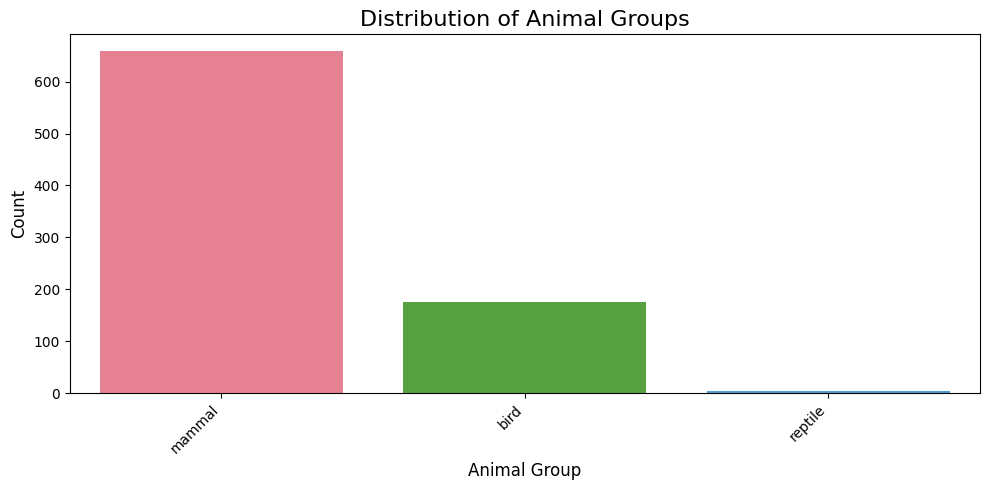

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('symptom_clustered_output.csv')
unique_animals = df['AnimalGroup'].value_counts().index
num_colors = len(unique_animals)

colors = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 5))
sns.countplot(
    x='AnimalGroup',
    data=df,
    order=unique_animals,
    palette=dict(zip(unique_animals, colors))
)

plt.title('Distribution of Animal Groups', fontsize=16)
plt.xlabel('Animal Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\misur\AppData\Local\Temp\ipykernel_6480\414160643.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


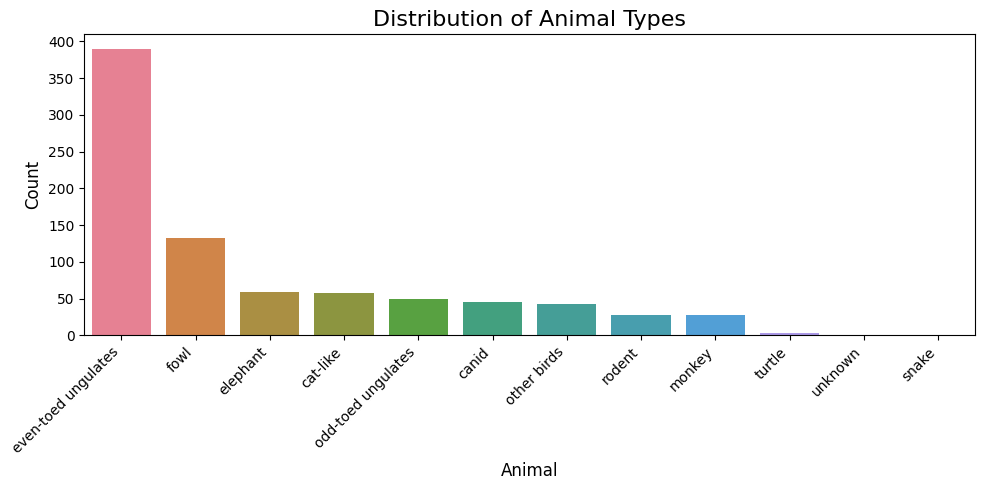

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('symptom_clustered_output.csv')
unique_animals = df['Animal'].value_counts().index
num_colors = len(unique_animals)

colors = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 5))
sns.countplot(
    x='Animal',
    data=df,
    order=unique_animals,
    palette=dict(zip(unique_animals, colors))
)

plt.title('Distribution of Animal Types', fontsize=16)
plt.xlabel('Animal', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\misur\AppData\Local\Temp\ipykernel_6480\4022001758.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


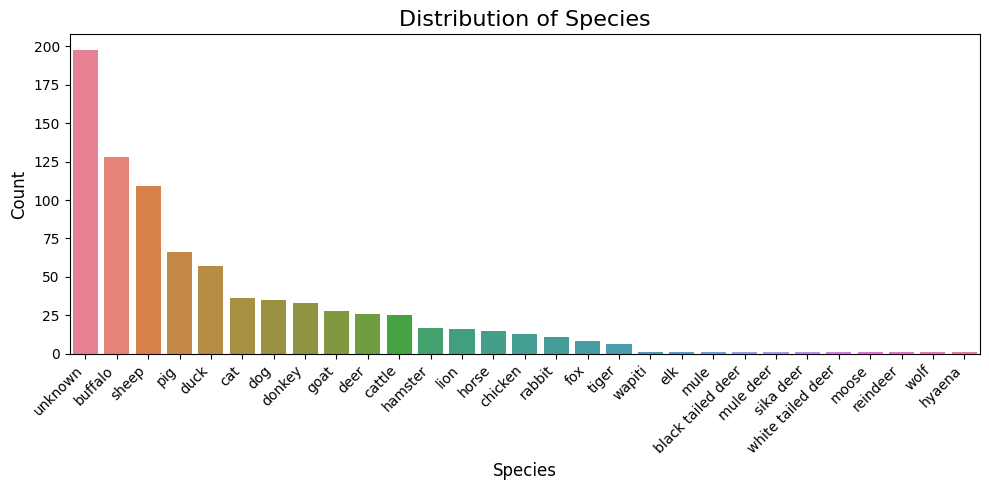

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('symptom_clustered_output.csv')
unique_animals = df['Species'].value_counts().index
num_colors = len(unique_animals)

colors = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 5))
sns.countplot(
    x='Species',
    data=df,
    order=unique_animals,
    palette=dict(zip(unique_animals, colors))
)

plt.title('Distribution of Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Anomália detektálás

**Első ránézésre és a Tanár úr javaslatára is az anomália detektálással próbálkoztam, mivel az adathalmaz extrém kiegyensúlyozatlan: 20 "No" (2.38%) és 818 "Yes" adatpont van. Az órán vett anomália detektálási módszerekkel vizsgáltam (pl. AutoEncoder, Gauss + EVT, One-Class SVM) a ritka, kiugró eseményeket (anomáliákat). Mivel az adatok címkézettek így inkább félig felügyelt tanulást alkalmaztam. A Kaggle dataset alatti kódok között nem találtam egyébként ebbe a témába vágó modelt**

 ### Beolvasás és előfeldolgozás

In [190]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn import __version__ as skl_version
from packaging import version

df = pd.read_csv("symptom_clustered_output.csv")
features = ['AnimalGroup', 'Animal', 'Species', 'symptoms1_cluster', 'symptoms2_cluster', 
            'symptoms3_cluster', 'symptoms4_cluster', 'symptoms5_cluster']
X = df[features].fillna('unknown')
cat_cols = ['AnimalGroup', 'Animal', 'Species']
num_cols = ['symptoms1_cluster', 'symptoms2_cluster', 'symptoms3_cluster', 
            'symptoms4_cluster', 'symptoms5_cluster']
y_true = df["Dangerous"].map({"no": -1, "yes": 1})
y_true_binary = (y_true == -1).astype(int)

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", MinMaxScaler(), num_cols)
]) if version.parse(skl_version) >= version.parse("1.2") else ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols),
    ("num", MinMaxScaler(), num_cols)
])
X_processed = preprocessor.fit_transform(X)


### Autoencoder model

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2361 - val_loss: 0.2366
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.2333 - val_loss: 0.2331
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.2303 - val_loss: 0.2288
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.2261 - val_loss: 0.2234
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.2209 - val_loss: 0.2168
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.2142 - val_loss: 0.2087
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.2056 - val_loss: 0.1989
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1976 - val_loss: 0.1872
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.1857 - val_loss: 0.1737
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.1739 - val_loss: 0.1587
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.1582 - val_loss: 0.1423
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - 

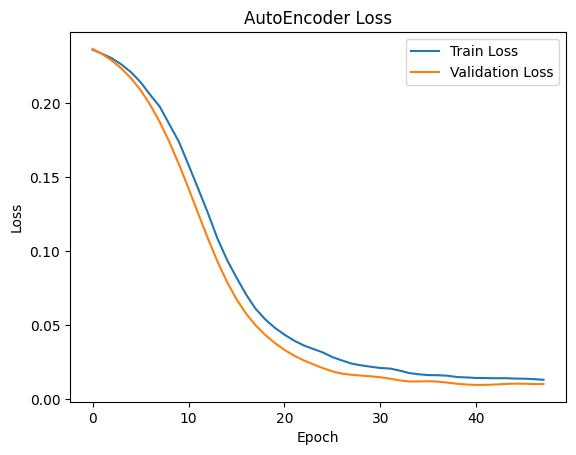

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
AutoEncoder
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        20
   Dangerous       0.98      0.97      0.97       818

    accuracy                           0.95       838
   macro avg       0.49      0.48      0.49       838
weighted avg       0.95      0.95      0.95       838



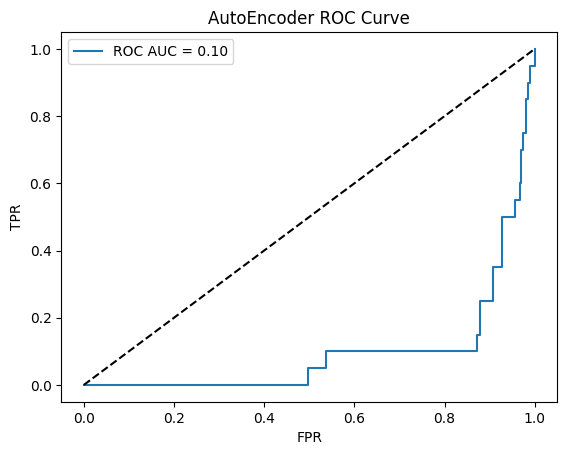

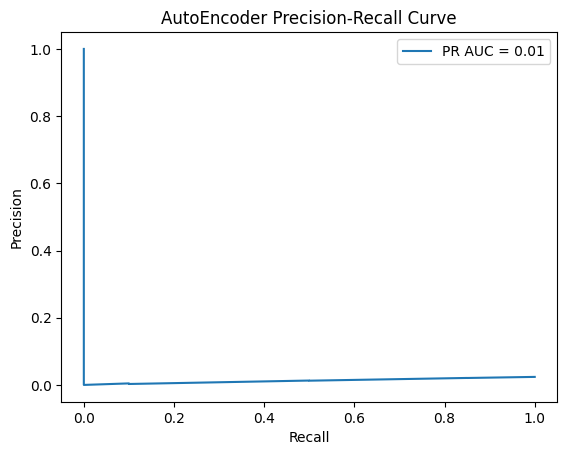

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

normal_mask = (y_true == -1)
X_normal_processed = X_processed[normal_mask]
input_dim = X_processed.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation="relu")(input_layer)
encoded = Dropout(0.1)(encoded)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(32, activation="relu")(encoded)
decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0015), loss="mse")

early_stop = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)
X_train_ae, X_test_ae = train_test_split(X_normal_processed, test_size=0.2, random_state=35)
history = autoencoder.fit(X_train_ae, X_train_ae, epochs=1000, batch_size=128, shuffle=True,
                validation_data=(X_test_ae, X_test_ae), callbacks=[early_stop], verbose=1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("AutoEncoder Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

X_reconstructed = autoencoder.predict(X_processed)
recon_error = np.mean(np.square(X_processed - X_reconstructed), axis=1)
sorted_errors = np.sort(recon_error)
best_thresh_ae = sorted_errors[int((1 - 0.03) * len(sorted_errors))]
y_pred_ae = np.where(recon_error > best_thresh_ae, -1, 1)
print("AutoEncoder")
print(classification_report(y_true, y_pred_ae, target_names=['Normal', 'Dangerous']))
roc_auc_ae = roc_auc_score(y_true_binary, recon_error)
precision_ae, recall_ae, _ = precision_recall_curve(y_true_binary, recon_error)
pr_auc_ae = auc(recall_ae, precision_ae)
fpr_ae, tpr_ae, _ = roc_curve(y_true_binary, recon_error)

plt.plot(fpr_ae, tpr_ae, label=f"ROC AUC = {roc_auc_ae:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("AutoEncoder ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

plt.plot(recall_ae, precision_ae, label=f"PR AUC = {pr_auc_ae:.2f}")
plt.title("AutoEncoder Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


**Miért nem működik?**
1. **Nem kiugrók az anomáliák:** Az AutoEncoder a "Yes" adatokat tanulta meg, és a rekonstrukciós hibát használta az anomáliák "No" detektálására. Azonban a "No" adatpontok rekonstrukciós hibája nem elég magas ahhoz, hogy elkülönítse őket a "Yes" adatpontoktól, így egyetlen "No" adatpontot sem azonosított (recall: 0.00).
2. **Extrém egyensúlytalanság van az adathalmazban:** A 20 "No" adatpont túl kicsi arány (2.38%) a 818 "Yes" adatponthoz képest. A többségi osztály mintázatát tanulja meg, és a kisebbségi osztályt teljesen figyelmen kívül hagyja!
3. **Félig felügyelt tanulás:** Nem használtam a "No" osztály címkéit a tanítás során, így nem kapott információt arról, hogy milyen mintázatok tartoznak az anomáliákhoz.
4. **Félrevezető metrikák:** Az accuracy (0.95) magas, de ez a "Yes" osztály jó teljesítménye miatt van (recall: 0.97). A macro avg F1-score (0.49) és a "No" osztály F1-score-ja (0.00) szerintem egyértelműen azt mutatja, hogy a modell nem tudja detektálni az anomáliákat.

### Gauss + EVT


Gauss + EVT
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00        20
   Dangerous       0.98      1.00      0.99       818

    accuracy                           0.98       838
   macro avg       0.49      0.50      0.49       838
weighted avg       0.95      0.98      0.96       838



C:\Users\misur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\misur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\misur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

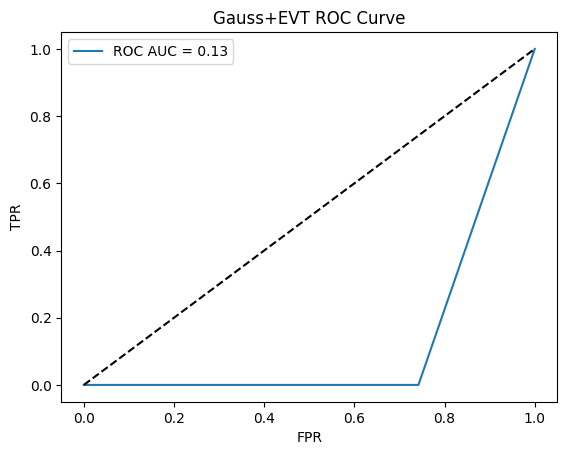

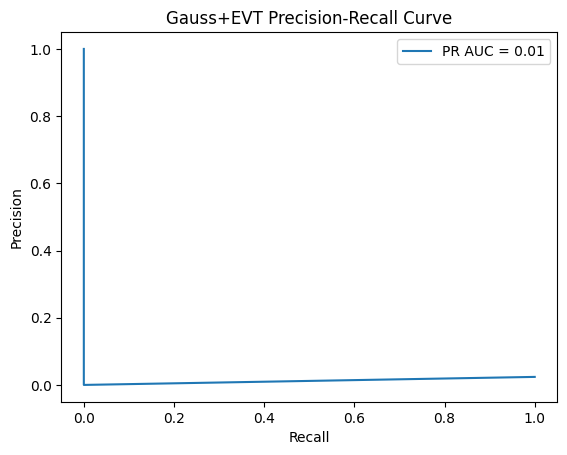

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from scipy.stats import norm, gumbel_r


means = np.mean(X_normal_processed, axis=0)
stds = np.std(X_normal_processed, axis=0)
stds = np.where(stds == 0, 1e-10, stds)
log_probs = np.zeros(X_processed.shape[0])
for i in range(X_processed.shape[1]):
    log_probs += norm.logpdf(X_processed[:, i], loc=means[i], scale=stds[i])
scores_gauss = -log_probs
params = gumbel_r.fit(scores_gauss)
gumbel_scores = gumbel_r.cdf(scores_gauss, *params)
sorted_gumbel_scores = np.sort(gumbel_scores)
best_thresh_gauss = sorted_gumbel_scores[int((1 - 0.03) * len(sorted_gumbel_scores))]
y_pred_gauss = np.where(gumbel_scores > best_thresh_gauss, -1, 1)
print("Gauss + EVT")
print(classification_report(y_true, y_pred_gauss, target_names=['Normal', 'Dangerous']))
roc_auc_gauss = roc_auc_score(y_true_binary, gumbel_scores)
precision_gauss, recall_gauss, _ = precision_recall_curve(y_true_binary, gumbel_scores)
pr_auc_gauss = auc(recall_gauss, precision_gauss)
fpr_gauss, tpr_gauss, _ = roc_curve(y_true_binary, gumbel_scores)

plt.plot(fpr_gauss, tpr_gauss, label=f"ROC AUC = {roc_auc_gauss:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("Gauss+EVT ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

plt.plot(recall_gauss, precision_gauss, label=f"PR AUC = {pr_auc_gauss:.2f}")
plt.title("Gauss+EVT Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

**Miért nem működik?**
1. **Nem kiugró anomáliák:** A model a "Yes" adatokat tanulta meg Gauss-eloszlással, és az EVT-vel (Gumbel-eloszlás) a szélsőséges valószínűségi score-okat próbáltam azonosítani. De egyetlen "No" adatpontot sem azonosított (recall: 0.00).
2. **Extrém egyensúlytalanság:** Az egyensúlytalanság miatt szintén ez a modell is a "Yes" osztályra fókuszál.
3. **Félig felügyelt tanulás:** A Gauss + EVT sem használta a "No" osztály címkéit a tanítás során, így nem kapott információt az anomáliák mintázatáról.
4. **Félrevezető metrikák:** Az accuracy (0.98) és a weighted avg F1-score (0.96) magas, de a macro avg F1-score (0.49) és a "No" osztály F1-score-ja (0.00) alapján a modell nem tudja detektálni az anomáliákat.

### OneClassSVM

SVM (One-Class SVM)
              precision    recall  f1-score   support

      Normal       0.15      0.25      0.19        20
   Dangerous       0.98      0.96      0.97       818

    accuracy                           0.95       838
   macro avg       0.56      0.61      0.58       838
weighted avg       0.96      0.95      0.95       838



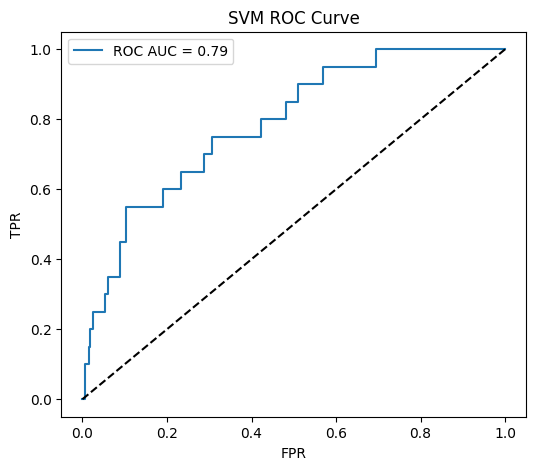

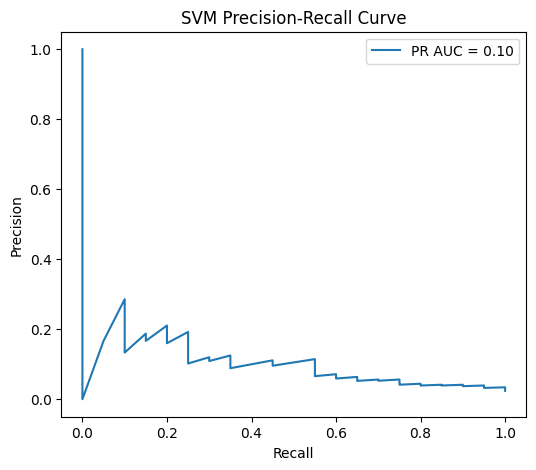

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve


normal_mask = (y_true == 1)
X_normal = X_processed[normal_mask]

# --- Train/test split ---
X_train_svm, X_test_svm = train_test_split(X_normal, test_size=0.2, random_state=35)

# --- One-Class SVM tanítása (csak normális adatokon) ---
svm = OneClassSVM(kernel='linear', nu=0.03)
svm.fit(X_train_svm)

# --- Predikció az összes adatra ---
y_pred_svm = svm.predict(X_processed)

# --- Kiértékelés ---
print("SVM (One-Class SVM)")
print(classification_report(y_true, y_pred_svm, target_names=['Normal', 'Dangerous']))

# --- ROC és PR AUC számítása ---
y_true_binary = (y_true == -1).astype(int)  # 1=anomália (Normal), 0=normál (Dangerous)
y_scores_svm = -svm.decision_function(X_processed) 
roc_auc_svm = roc_auc_score(y_true_binary, y_scores_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_true_binary, y_scores_svm)
pr_auc_svm = auc(recall_svm, precision_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_true_binary, y_scores_svm)

# --- ROC görbe ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, label=f"ROC AUC = {roc_auc_svm:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.title("SVM ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# --- Precision-Recall görbe ábrázolása ---
plt.figure(figsize=(6, 5))
plt.plot(recall_svm, precision_svm, label=f"PR AUC = {pr_auc_svm:.2f}")
plt.title("SVM Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

**Miért nem működik?**
1. **Nem kiugró anomáliák:** A "No" osztály recallja elég alacsony (0.25), vagyis az anomáliák 75%-át (15 adatpont) nem észlelte. A precision (0.15) szintén alacsony, mert sok "Yes" adatpontot (28) tévesen "No"-nak prediktált (fals pozitív). Az anomáliák nem különböznek jelentősen a normális adatoktól a OneClassSVM hiperplanáris alapú elkülönítése szempontjából.
2. **Extrém egyensúlytalanság:** Az egyensúlytalanság miatt a "Yes" osztályra fókuszál ez is, és a "No" osztály alulreprezentáltsága miatt csak korlátozottan tudja detektálni az anomáliákat.
3. **Félig felügyelt tanulás:** A One-Class SVM csak a "Yes" adatokat tanulta meg, és nem kapott információt a "No" osztályról a tanítás során, így a hiperplán nem tudja hatékonyan elkülöníteni az anomáliákat.
4. **A metrikák félrvezetőek:** Az accuracy (0.95) és a weighted avg F1-score (0.95) magas, de a macro avg F1-score (0.58) és a "No" osztály gyenge teljesítménye (F1-score: 0.19) is azt mutatja, hogy a modell nem valami kiegyensúlyozott.

### Gyanús dolgok az adathalmazban

In [ ]:
df[184:192] # a 190. sorban a symptoms3 oszlopban a high mortality szerepel, ami már egy elég súlyos következménye a betegségnek, mert belehal az állat és nem kezelhető veszélytelennek...
# Továbbra is vannak van furcsa értékek és lehetnek is még, amiket nem igazán lehet már kezelni max csak eldobni, de az adatveszteséggel járna... Szerény véleményem szerint olyan benyomást kelt az adathalmaz, mintha fake genrated lenne.

,AnimalGroup,Animal,Species,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous,symptoms1_cluster,...,symptoms2_canonical,symptoms3_cluster,symptoms3_corrected,symptoms3_canonical,symptoms4_cluster,symptoms4_corrected,symptoms4_canonical,symptoms5_cluster,symptoms5_corrected,symptoms5_canonical
184,bird,fowl,chicken,weakness,yellow or green dropping,purplish combs,wattles,drop on egg production,no,266,...,yellow or green dropping,92,purplish combs,purplish combs,328,wattles,wattle,104,drop on egg production,drop on egg production
185,bird,fowl,chicken,neck paralysis,diarrhea,ruffled feathers,labored breathing,weakness,no,13,...,diarrhea,195,ruffled feathers,ruffled feathers,9,laboured breathing,laboured breathing,266,weakness,failing
186,bird,fowl,chicken,facial swelling,lacrimation,diarrhea,anorexia,nasal discharge,no,7,...,lacrimation,17,diarrhoea,diarrhea,56,anorexia,anorexia,102,nasal discharge,nasal discharge
187,bird,fowl,chicken,loss of appetite,depression,paralyzed leg,weight loss,anemia,no,4,...,depression,13,paralysed leg,paralysed leg,185,weight loss,weight loss,422,anaemia,anemia
188,bird,fowl,chicken,dejection,loss of appetite,slow growth,diarrhea,lesion,no,222,...,loss of appetite,34,slow growth,slow growth,17,diarrhoea,diarrhea,18,lesion,lesion
189,bird,fowl,chicken,severe swellimg,heavy breathing,diarrhea,weight loss,pain,no,7,...,heavy breathing,17,diarrhoea,diarrhea,185,weight loss,weight loss,95,pain,pain
190,bird,fowl,chicken,weakness,diarrhea,high moratality,dehydration,anorexia,no,266,...,diarrhea,37,high mortality,high mortality,35,dehydration,dehydration,56,anorexia,anorexia
191,mammal,monkey,unknown,fever,hepatitis,skin rashes,weight loss,pain,no,175,...,hepatitis,87,skin rashes,skin rashes,185,weight loss,weight loss,95,pain,pain


## KNN és SVM az eredeti adathalmazon

**A Kaggle dataset-ek közt leginkább felhasznált módszerek közt szerepel a KNN és az SVM, ezért ez volt a következő lépés, amit kipróbáltam**

### KNN szomszédok vizsgálata

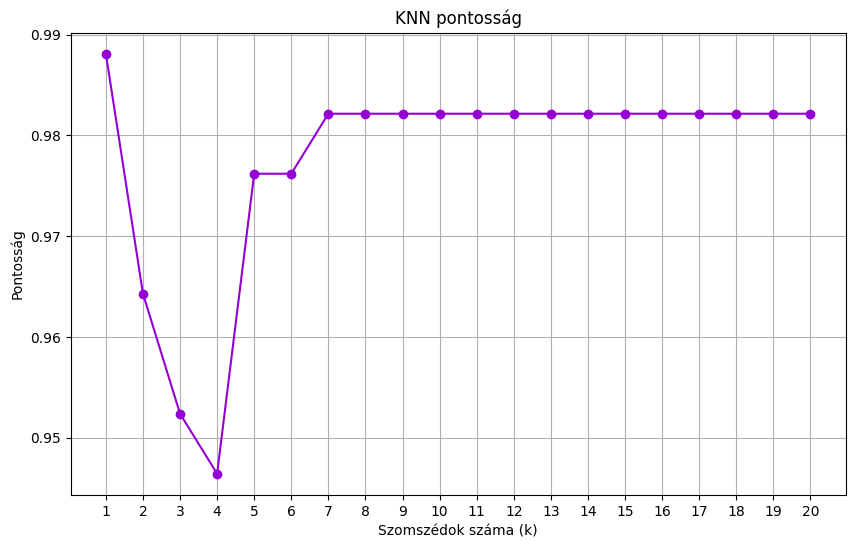

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("symptom_clustered_output.csv")

features = [
    'AnimalGroup', 'Animal', 'Species', 
    'symptoms1_cluster', 
    'symptoms2_cluster', 
    'symptoms3_cluster', 
    'symptoms4_cluster',
    'symptoms5_cluster', 
]

X = df[features].copy()
y = LabelEncoder().fit_transform(df['Dangerous'])

X = X.fillna("missing")
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='darkviolet')
plt.title('KNN pontosság')
plt.xlabel('Szomszédok száma (k)')
plt.ylabel('Pontosság')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### KNN + SVM + eredmények

**Mivel az adathalmaz brutálisan kiegyensúlyozatlan (849 "Yes" - 20 "No"), a sima KNN vagy SVM tanulás magától értetődően nem fog tudni jól általánosítani a ritka osztályokra... az egyszerűen tanított modellek gyorsan túlilleszkednek a domináns osztályra**

🔷 KNN Eredmények:
[[  1   2]
 [  7 158]]
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         3
           1       0.99      0.96      0.97       165

    accuracy                           0.95       168
   macro avg       0.56      0.65      0.58       168
weighted avg       0.97      0.95      0.96       168

🔶 SVM (balanced) Eredmények:
[[  2   1]
 [ 35 130]]
              precision    recall  f1-score   support

           0       0.05      0.67      0.10         3
           1       0.99      0.79      0.88       165

    accuracy                           0.79       168
   macro avg       0.52      0.73      0.49       168
weighted avg       0.98      0.79      0.86       168



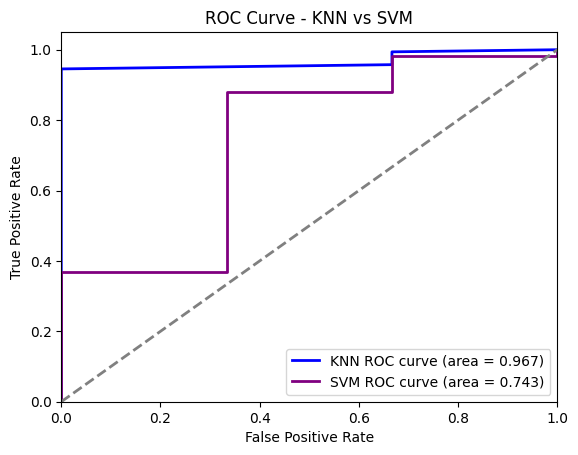

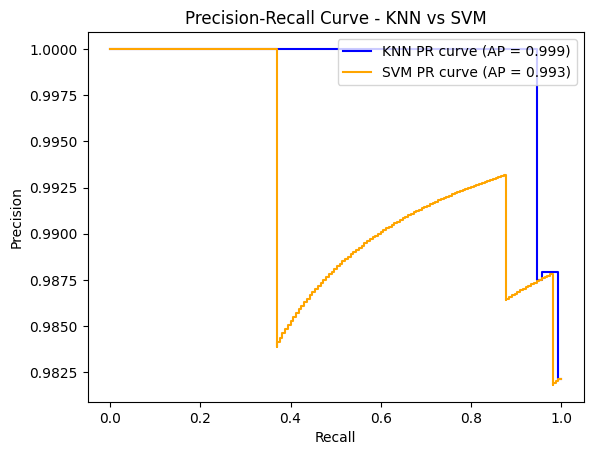

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

df = pd.read_csv("symptom_clustered_output.csv")

features = [
    'AnimalGroup', 'Animal', 'Species', 
    'symptoms1_cluster', 
    'symptoms2_cluster', 
    'symptoms3_cluster', 
    'symptoms4_cluster',
    'symptoms5_cluster', 
]

X = df[features].copy()
y = LabelEncoder().fit_transform(df['Dangerous'])

X = X.fillna("missing")
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔷 KNN Eredmények:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)
ap_knn = average_precision_score(y_test, y_prob_knn)

svm = SVC(kernel='linear', class_weight='balanced', probability=True)  # Probability=True hozzáadva
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔶 SVM (balanced) Eredmények:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
ap_svm = average_precision_score(y_test, y_prob_svm)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.3f})')
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN vs SVM')
plt.legend(loc="lower right")
plt.show()

plt.figure()
plt.step(recall_knn, precision_knn, color='blue', where='post', label=f'KNN PR curve (AP = {ap_knn:.3f})')
plt.step(recall_svm, precision_svm, color='orange', where='post', label=f'SVM PR curve (AP = {ap_svm:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN vs SVM')
plt.legend(loc="upper right")
plt.show()

## KNN & SVM modell under- és oversampling kombinálással

**Az előző példában látott okok miatt, under- és oversampling kombinációt csinálok az adathalmazra. Leszűkítem a domináns ("Yes") példák számát, így már jobban fog figyelni a kisebbségi osztályra. Ugyanakkor új példákat generálok a "No"-hoz, így jobban kiegyensúlyozza az osztályokat anélkül, mintha eldobnánk adatot. Ez azért is egy működő képes módszer, mert nő az osztályok közötti határ élessége. A célom, hogy ne maradjanak rejtve a nem veszélyes esetek, mert az ilyen betegség detáktáló esetekben a ritka osztály felismerése fontosabb, mint az általános pontosság.**

### KNN+ADASYN+RandomUnderSampler

🔷 KNN + ADASYN + Undersampling Eredmények:
[[127   0]
 [ 82  49]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       127
           1       1.00      0.37      0.54       131

    accuracy                           0.68       258
   macro avg       0.80      0.69      0.65       258
weighted avg       0.81      0.68      0.65       258



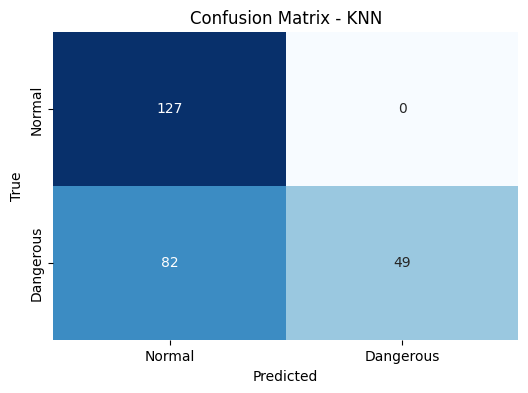

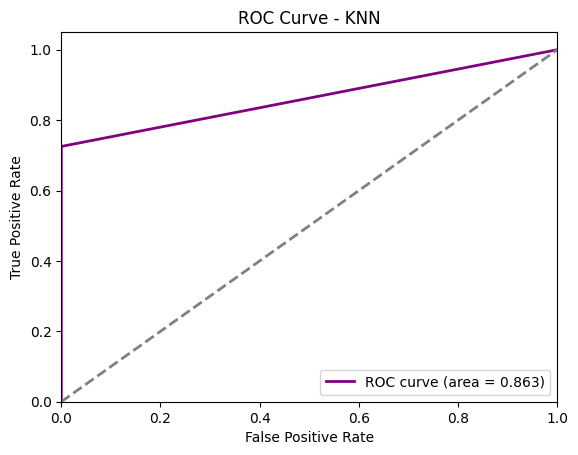

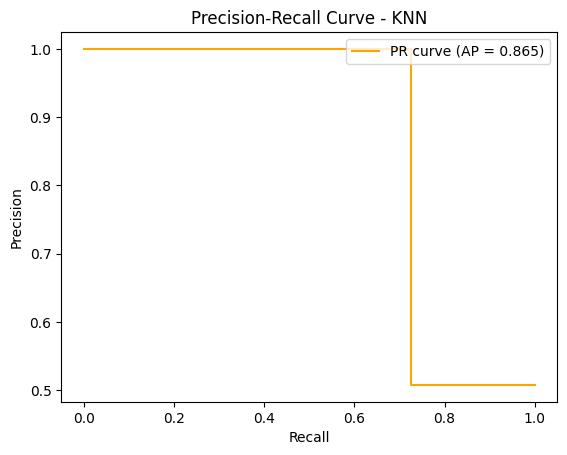

In [219]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = pd.read_csv("symptom_clustered_output.csv")

features = ['AnimalGroup', 'Animal', 'Species', 'symptoms1_cluster', 'symptoms2_cluster', 'symptoms3_cluster', 'symptoms4_cluster', 'symptoms5_cluster']
X = df[features].fillna('unknown')  # NaN-okat pótoljuk

X = pd.get_dummies(X, columns=features).astype(int)

y = LabelEncoder().fit_transform(df['Dangerous'])

adasyn = ADASYN(sampling_strategy=0.7, random_state=35)
undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=35)

pipeline = Pipeline([
    ('adasyn', adasyn),
    ('under', undersample)
])

X_res, y_res = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("🔷 KNN + ADASYN + Undersampling Eredmények:")
print(cm)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Dangerous'], yticklabels=['Normal', 'Dangerous'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure()
plt.step(recall, precision, color='orange', where='post', label=f'PR curve (AP = {ap:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend(loc="upper right")
plt.show()

**Túlságosan elfogult a nem veszélyes osztály felé! Nagyon sok veszélyes példát kihagy (ez veszélyes lehet, ha pl. diagnózist kellene támogatni)**

## SVM + SMOTE + Undersampling

In [224]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

features = ['AnimalGroup','Animal','Species','symptoms1_cluster', 'symptoms2_cluster', 'symptoms3_cluster', 'symptoms4_cluster', 'symptoms5_cluster']
X = df[features].fillna('unknown')

# Dictionary to keep mappings for label encoded columns
label_mappings = {}

for col in ['AnimalGroup', 'Animal', 'Species']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Save mappings to CSV files
for col, mapping in label_mappings.items():
    mapping_df = pd.DataFrame(list(mapping.items()), columns=['animal', 'label'])
    mapping_df.to_csv(f'label_encoding_{col}.csv', index=False)

y = LabelEncoder().fit_transform(df['Dangerous'])

smote = SMOTE(sampling_strategy=0.7, random_state=35)
undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=35)

pipeline = Pipeline([
    ('smote', smote),
    ('under', undersample)
])

X_res, y_res = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=35)

### SVM modell - rbf


🔷 SVM + SMOTE + Undersampling Eredmények (LabelEncoded features):
[[118   0]
 [ 34 106]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       118
           1       1.00      0.76      0.86       140

    accuracy                           0.87       258
   macro avg       0.89      0.88      0.87       258
weighted avg       0.90      0.87      0.87       258



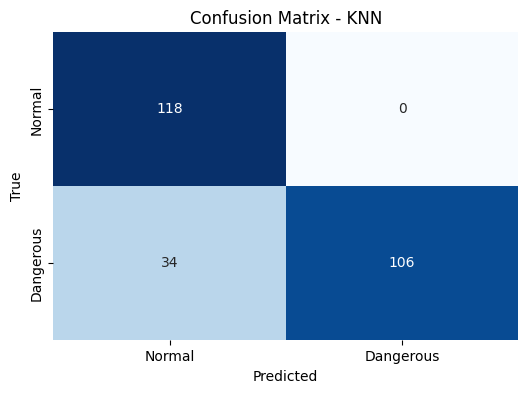

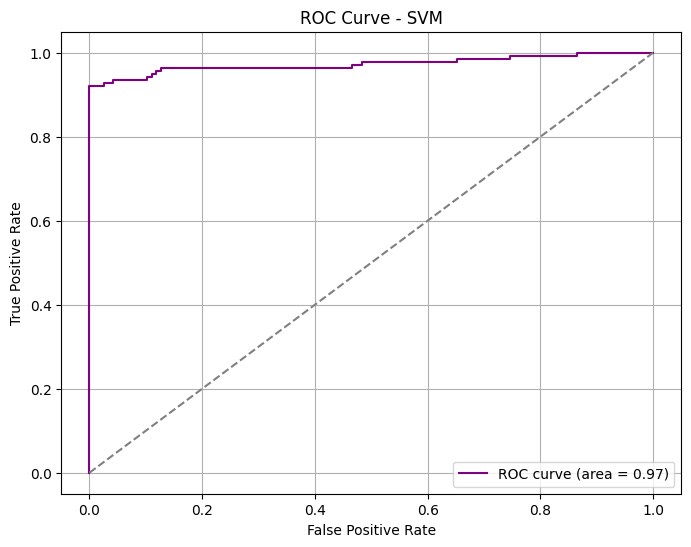

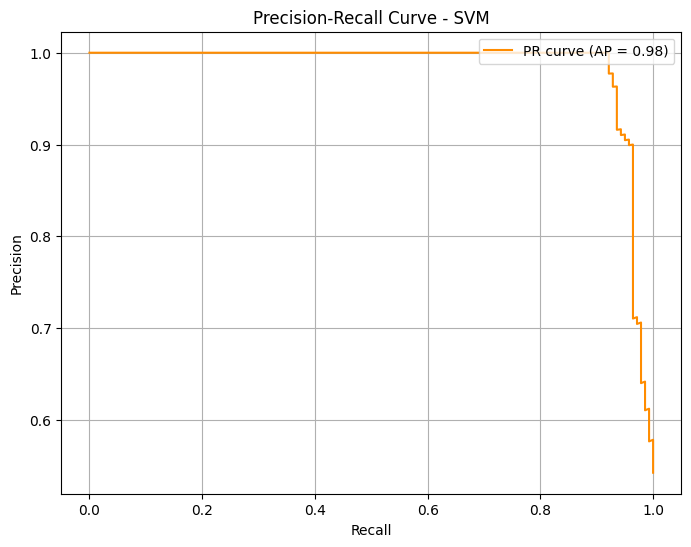

In [221]:
svmrbf = SVC(kernel='rbf', random_state=35, class_weight='balanced', probability=True)
svmrbf.fit(X_train, y_train)

y_pred = svmrbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("🔷 SVM + SMOTE + Undersampling Eredmények (LabelEncoded features):")
print(cm)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Dangerous'], yticklabels=['Normal', 'Dangerous'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = svm.decision_function(X_test)  

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = svm.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

ap_score = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


ExactExplainer explainer: 1030it [19:32,  1.15s/it]                          


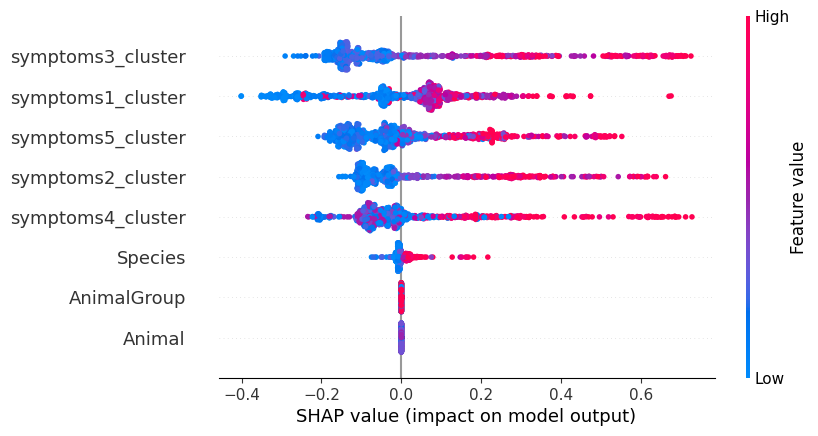

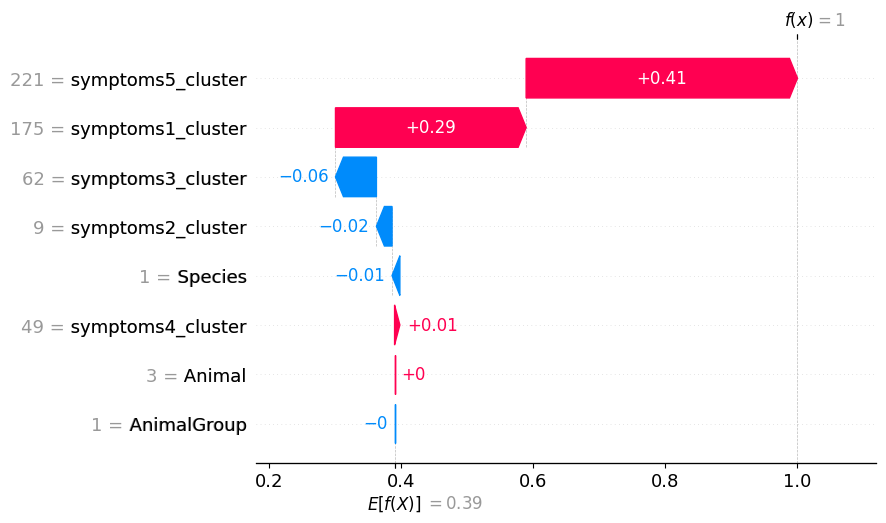

In [ ]:
import shap
import matplotlib.pyplot as plt

model = svmrbf

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

shap.plots.waterfall(shap_values[0])  # az első minta elemzése

In [222]:
import joblib
joblib.dump(svmrbf, "svmrbf_model.pkl")


['svmrbf_model.pkl']

### SVM modell - linear


🔷 SVM + SMOTE + Undersampling Eredmények (LabelEncoded features):
[[101  17]
 [ 24 116]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       118
           1       0.87      0.83      0.85       140

    accuracy                           0.84       258
   macro avg       0.84      0.84      0.84       258
weighted avg       0.84      0.84      0.84       258



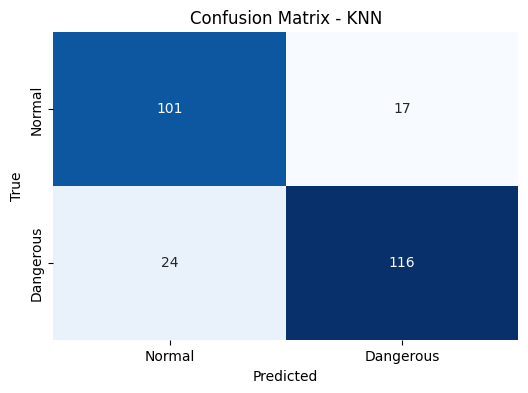

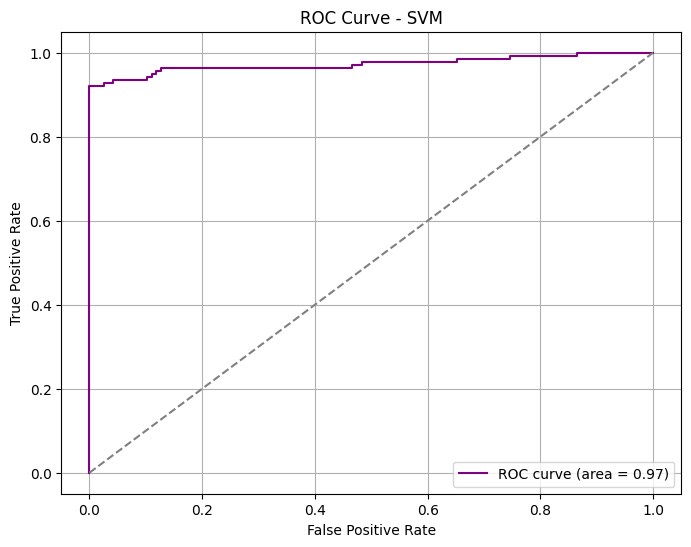

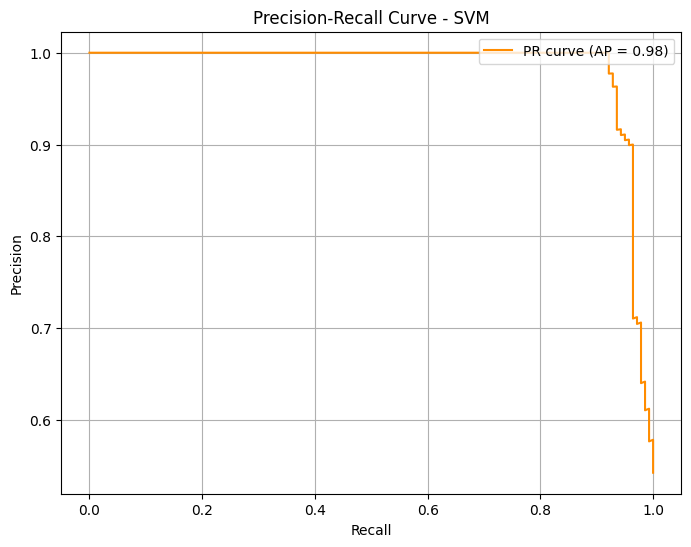

In [214]:
# SVM modell - linear
svmlinear = SVC(kernel='linear', random_state=35, class_weight='balanced', probability=True)
svmlinear.fit(X_train, y_train)

# 8. Predikció és értékelés
y_pred = svmlinear.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print("🔷 SVM + SMOTE + Undersampling Eredmények (LabelEncoded features):")
print(cm)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Normal', 'Dangerous'], yticklabels=['Normal', 'Dangerous'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = svm.decision_function(X_test)  

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='purple', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = svm.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

ap_score = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange', label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



ExactExplainer explainer: 1030it [03:25,  4.76it/s]                          


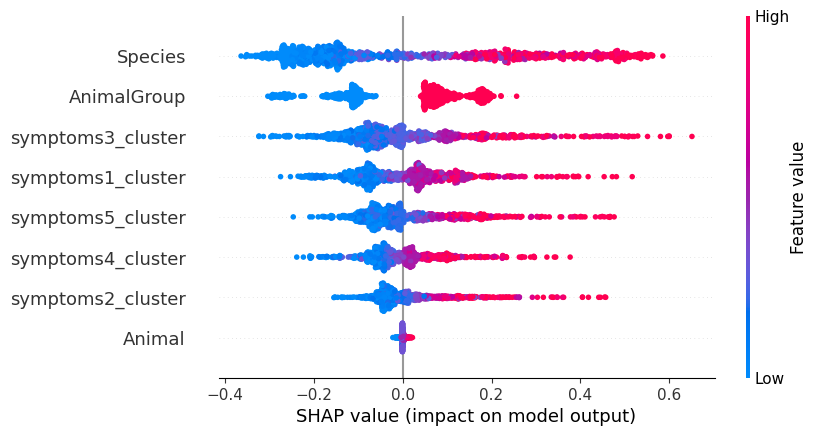

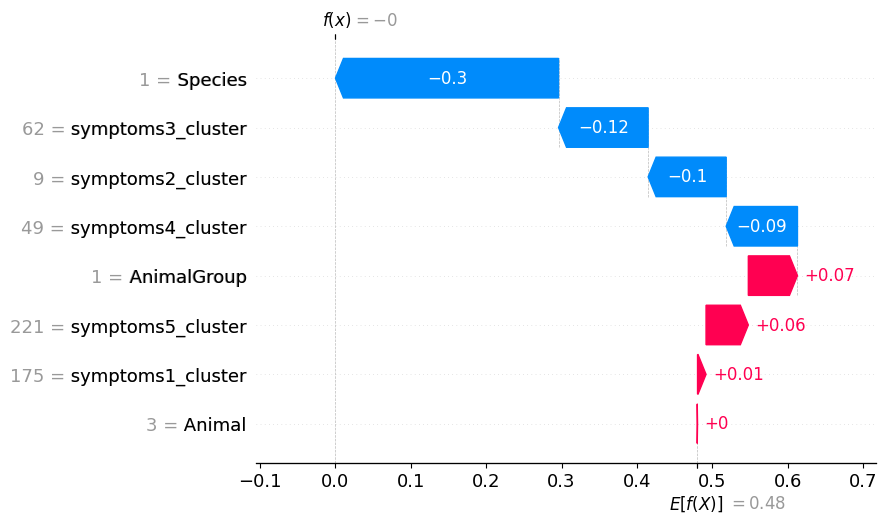

In [ ]:
import shap
import matplotlib.pyplot as plt

model = svmlinear 

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

shap.plots.waterfall(shap_values[0])  # az első minta elemzése


In [215]:
import joblib
joblib.dump(svmlinear, "svmlinear_model.pkl")


['svmlinear_model.pkl']

**Sokkal kiegyensúlyozottabb (mindkét osztályra jól teljesít). Magasabb pontosság, és jobb lett a recall a veszélyeseknél. Sokkal megbízhatóbb döntéshozatal kritikus esetekben (pl. ha az állat veszélyesen beteg, az elég fontos!)**